# Credit Card Fraud Detection

The dataset Repo:
https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud?resource=download



### Import packages

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import IsolationForest #iForest
from sklearn.neighbors import LocalOutlierFactor #LOF
from sklearn.covariance import EllipticEnvelope #Robust Coveriance
from sklearn.svm import OneClassSVM #OCSVM
from sklearn.metrics import classification_report, accuracy_score

### EDA

Explor on data and show any interesting fact abuot this famous dataset.

In [2]:
# Load the dataset (adjust the path as necessary)
!gdown --id 1l_tRQZ48_GFNVv_lu_ZPyUQO48J3rkyL
data = pd.read_csv('creditcard.csv')

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1l_tRQZ48_GFNVv_lu_ZPyUQO48J3rkyL
To: /content/creditcard.csv
100% 151M/151M [00:04<00:00, 33.4MB/s]


In [14]:
# EDA
data.shape
data.head()
data.info()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

### Preprocessing Phase

In [4]:
# Assuming 'Class' is the column indicating fraud (1) or non-fraud (0)
X = data.drop('Class', axis=1)
y = data['Class']

# For anomaly detection, we often deal with unsupervised methods, so we'll ignore the y label during training
# Split the dataset into training and test sets
# You can also slice data to train the model with almost 10000 records only in case the training time rises
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)
X_train_10000 = X_train_norm[:10000,:]
X_test_10000 = X_test_norm[:10000,:]
y_test_10000 = y_test[:10000]

### Prepare the models

In [6]:
# Define the models
models = {
    "Isolation Forest": IsolationForest(n_estimators=100, contamination='auto', random_state=42),
    "Local Outlier Factor": LocalOutlierFactor(n_neighbors=20, contamination='auto', novelty=True),
    "Robust Covariance": EllipticEnvelope(support_fraction=1., contamination=0.1),
    "One-Class SVM": OneClassSVM(kernel='linear', gamma=0.001, nu=0.05),
}

### Traning the models & Evaluate the models
evaluate and compare the performance of models.

In [10]:
# you should notice that LOF only has fit_predict method.
# Provide a for loop to walk on the models dict and train each of them one by one within the loop
# Reshape the prediction values to 0 (normal) and 1 (fraud)
# Calculate accuracy and other metrics

for name, model in models.items():
    model.fit(X_train_10000)
    y_pred = model.predict(X_test_10000)
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    print(f"{name}:")
    print(classification_report(y_test_10000, y_pred))
    print("Accuracy:", accuracy_score(y_test_10000, y_pred))
    print("-" * 30)

Isolation Forest:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      9984
           1       0.03      0.75      0.06        16

    accuracy                           0.96     10000
   macro avg       0.52      0.86      0.52     10000
weighted avg       1.00      0.96      0.98     10000

Accuracy: 0.9645
------------------------------
Local Outlier Factor:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99      9984
           1       0.05      0.75      0.09        16

    accuracy                           0.97     10000
   macro avg       0.52      0.86      0.54     10000
weighted avg       1.00      0.97      0.99     10000

Accuracy: 0.9743
------------------------------
Robust Covariance:
              precision    recall  f1-score   support

           0       1.00      0.89      0.94      9984
           1       0.01      0.88      0.03        16

    accuracy               

### Interpretation
Highlight the best model performance and explain what caused this model can outperform others?

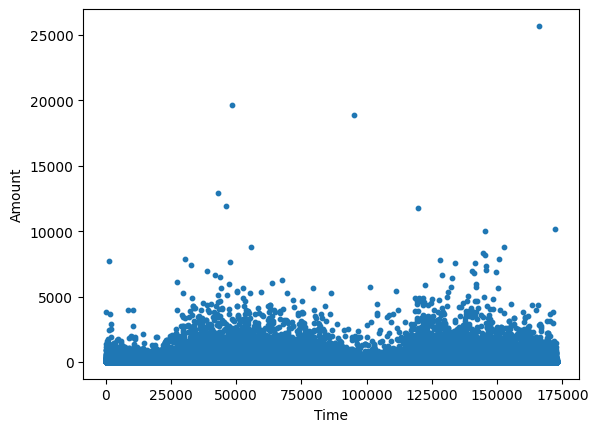

In [13]:
data.plot.scatter(x='Time', y='Amount', s=10);